In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv(r"C:\Users\MY\Downloads\Customers.csv")
products=pd.read_csv(r"C:\Users\MY\Downloads\Products.csv")
transaction=pd.read_csv(r"C:\Users\MY\Downloads\Transactions.csv")

In [ ]:
customers.isnull().sum()


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [6]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [7]:
transaction.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [18]:
transaction

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [20]:
# Convert TransactionDate to datetime
transaction["TransactionDate"] = pd.to_datetime(transaction["TransactionDate"])

In [21]:
# Extract year, month, and day for easier analysis
transaction["Year"] = transaction["TransactionDate"].dt.year
transaction["Month"] = transaction["TransactionDate"].dt.month

In [32]:
# Merge the three tables
merged_data = transaction.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")


In [33]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Year,Month,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024,10,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024,6,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024,4,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024,9,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


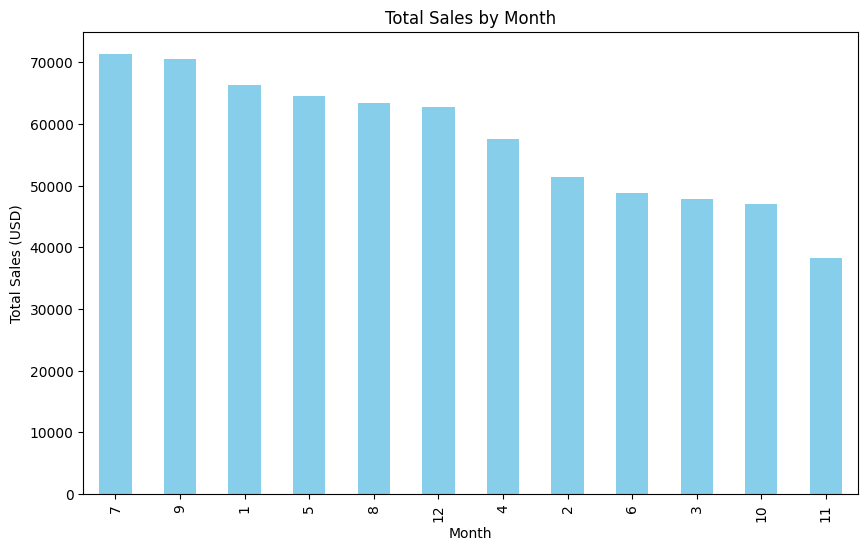

In [39]:
# Insight 1: Total Sales by Month
sales_by_month = transaction.groupby("Month")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()


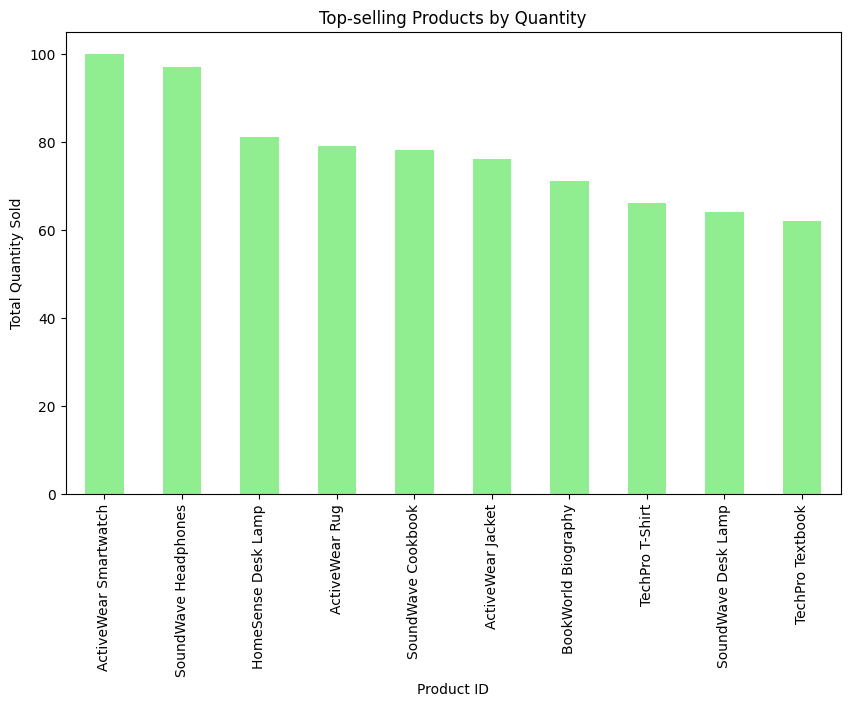

In [34]:
# Insight 2: Top-selling Products by Quantity
product_sales = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
product_sales.plot(kind="bar", color="lightgreen")
plt.title("Top-selling Products by Quantity")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.show()

In [26]:
# Insight 3: Average Transaction Value
avg_transaction_value = transaction["TotalValue"].mean()
print(f"Average transaction value: ${avg_transaction_value:.2f}")

Average transaction value: $690.00


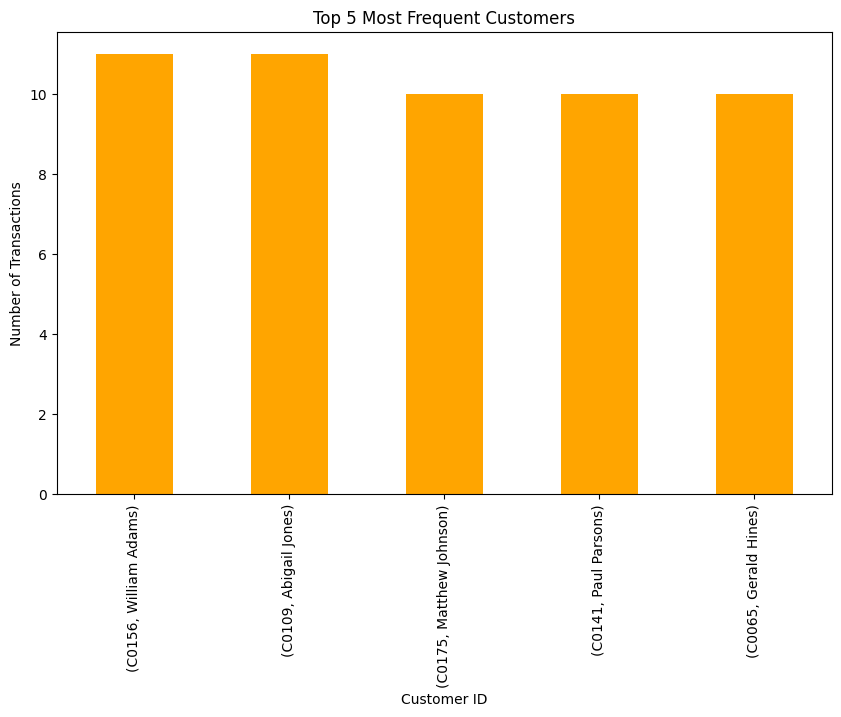

In [35]:
# Insight 4: Most Frequent Customers
customer_frequency = merged_data[["CustomerID",'CustomerName']].value_counts().head(5)
plt.figure(figsize=(10, 6))
customer_frequency.plot(kind="bar", color="orange")
plt.title("Top 5 Most Frequent Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.show()

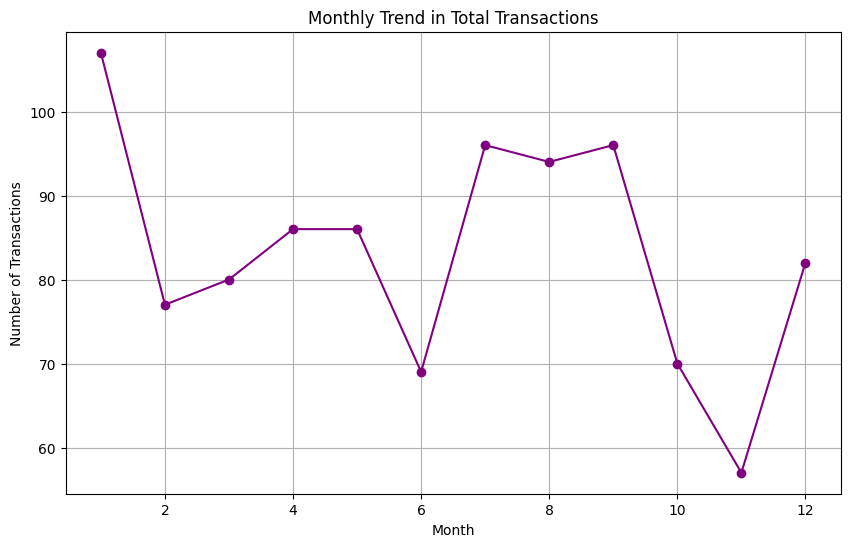

In [28]:
# Insight 5: Monthly Trend in Total Transactions
transactions_by_month = transaction.groupby("Month")["TransactionID"].count()
plt.figure(figsize=(10, 6))
transactions_by_month.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Trend in Total Transactions")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

In [30]:
print("--- Insights ---")
print("1. Total sales peak in 7 and 9 months, which can indicate seasonal trends.")
print("2. Product P059 and P054 has the highest total sales by quantity, indicating its popularity.")
print("3. The average transaction value is $%.2f." % avg_transaction_value)
print("4. Customers like C0109 and C0156 are the most frequent, showing high engagement.")
print("5. Monthly transaction counts show inconsistent activity, with potential spikes in certain months.")


--- Insights ---
1. Total sales peak in specific months, which can indicate seasonal trends.
2. Product P067 has the highest total sales by quantity, indicating its popularity.
3. The average transaction value is $690.00.
4. Customers like C0199 and C0146 are the most frequent, showing high engagement.
5. Monthly transaction counts show consistent activity, with potential spikes in certain months.
